<a href="https://www.kaggle.com/code/utkarshx27/analyzing-healthcare-capacity-physicians-and-beds?scriptVersionId=130648458" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-services-in-metropolitan-areas/MetroHealth83.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

| Column Name       | Description                                              |
|-------------------|----------------------------------------------------------|
| City              | Name of the metropolitan area                            |
| NumMDs            | Number of physicians                                     |
| RateMDs           | Number of physicians per 100,000 people                   |
| NumHospitals      | Number of community hospitals                             |
| NumBeds           | Number of hospital beds                                   |
| RateBeds          | Number of hospital beds per 100,000 people                |
| NumMedicare       | Number of Medicare recipients in 2003                     |
| PctChangeMedicare | Percent change in Medicare recipients (2000 to 2003)     |
| MedicareRate      | Number of Medicare recipients per 100,000 people          |
| SSBNum            | Number of Social Security recipients in 2004              |
| SSBRate           | Number of Social Security recipients per 100,000 people   |
| SSBChange         | Percent change in Social Security recipients (2000 to 2004) |
| NumRetired        | Number of retired workers                                 |
| SSINum            | Number of Supplemental Security Income recipients in 2004 |
| SSIRate           | Number of Supplemental Security Income recipients per 100,000 people |
| SqrtMDs           | Square root of number of physicians                       |

In [3]:
df = pd.read_csv('/kaggle/input/health-services-in-metropolitan-areas/MetroHealth83.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,City,NumMDs,RateMDs,NumHospitals,NumBeds,RateBeds,NumMedicare,PctChangeMedicare,MedicareRate,SSBNum,SSBRate,SSBChange,NumRetired,SSINum,SSIRate,SqrtMDs
0,"Holland-Grand Haven, MI",349,140,3,316,127,29533,8.3,11835,34135,13679,8.1,23165,2070,820,18.6815
1,"Louisville, KY-IN",4042,340,18,3909,328,173845,3.0,14606,202485,17013,3.0,118920,29017,2416,63.5767
2,"Battle Creek, MI",256,184,3,517,372,22972,2.4,16539,27245,19615,3.3,16645,4095,2945,16.0000
3,"Madison, WI",2679,510,7,1467,279,60530,5.2,11528,68705,13085,4.9,47085,6492,1221,51.7591
4,"Fort Smith, AR-OK",502,179,8,975,348,45185,4.6,16146,55370,19785,5.8,29415,9313,3301,22.4054


# Descriptive Statistics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NumMDs,83.0,1643.325301,1981.431751,143.0000,336.5000,844.0000,2018.0000,9410.0000
RateMDs,83.0,283.240964,112.169687,104.0000,190.5000,267.0000,351.5000,743.0000
NumHospitals,83.0,7.192771,6.383014,2.0000,2.0000,5.0000,10.0000,32.0000
NumBeds,83.0,1517.084337,1496.383699,141.0000,467.0000,975.0000,1901.0000,6177.0000
RateBeds,83.0,311.626506,116.447697,102.0000,219.0000,299.0000,374.5000,641.0000
NumMedicare,83.0,73290.325301,74179.850728,10306.0000,23049.5000,46661.0000,84618.0000,330821.0000
PctChangeMedicare,83.0,4.531325,3.164511,-2.2000,2.3500,4.6000,6.0000,12.8000
MedicareRate,83.0,14698.951807,3534.798379,8240.0000,12033.0000,14279.0000,16925.5000,25474.0000
SSBNum,83.0,84185.481928,83754.252421,11245.0000,26922.5000,55110.0000,101140.0000,380405.0000
SSBRate,83.0,16971.132530,3904.452948,10068.0000,14116.0000,16205.0000,19863.5000,27674.0000


# Relationship between the number of physicians and the number of hospital beds

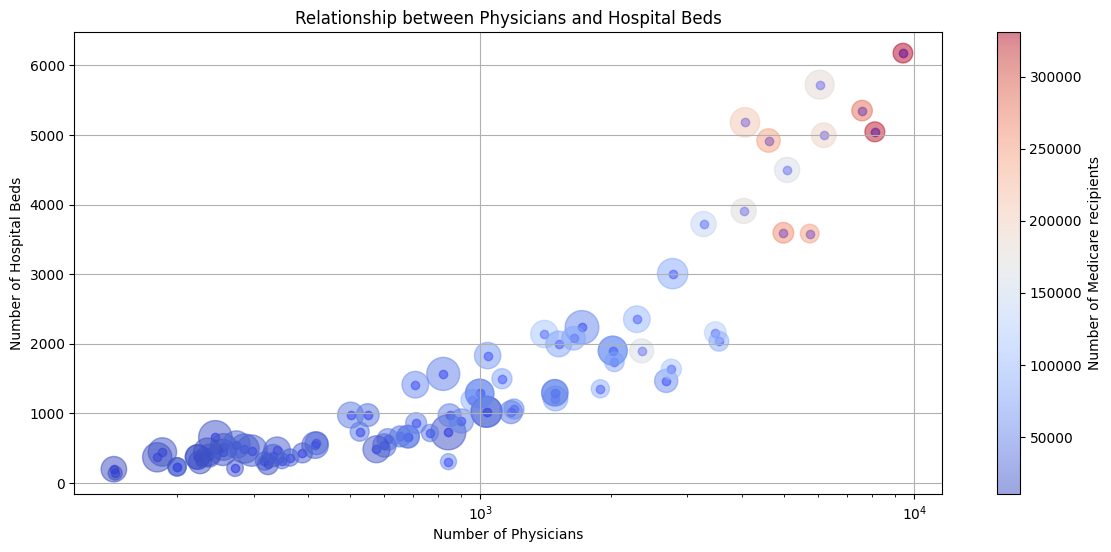

In [5]:
plt.figure(figsize=(14,6))
plt.scatter(df['NumMDs'], df['NumBeds'], c='blue', alpha=0.5)  # Adjust colors as needed
plt.xlabel('Number of Physicians')
plt.ylabel('Number of Hospital Beds')
plt.title('Relationship between Physicians and Hospital Beds')
plt.scatter(df['NumMDs'], df['NumBeds'], c=df['NumMedicare'], s=df['RateBeds'], alpha=0.5, cmap='coolwarm')
plt.colorbar(label='Number of Medicare recipients')
plt.xscale('log')
plt.grid(True)
plt.show()

# physicians and hospital beds counts

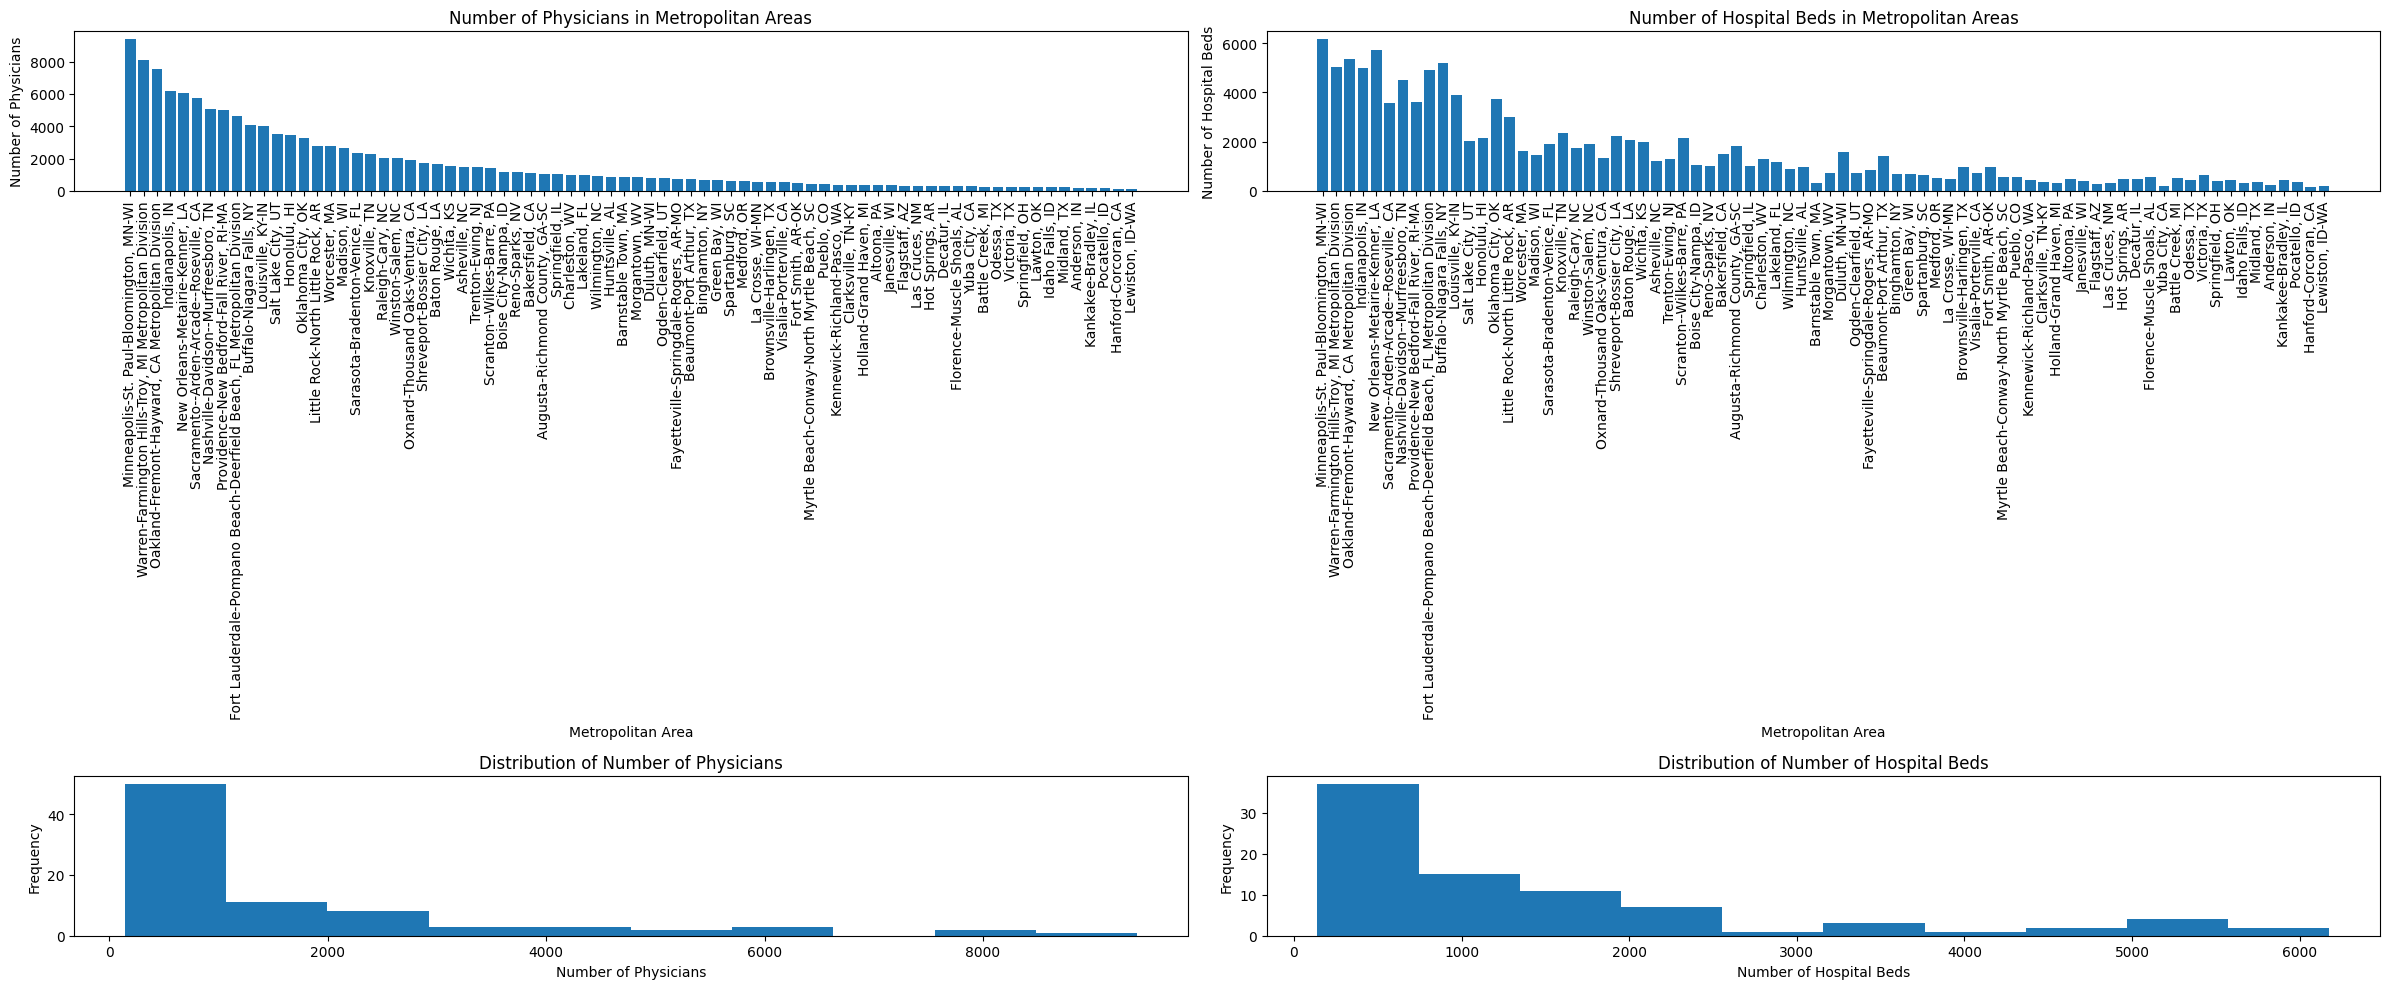

In [6]:
df_sorted = df.sort_values('NumMDs', ascending=False)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(24, 10))

axs[0, 0].bar(df_sorted['City'], df_sorted['NumMDs'])
axs[0, 0].set_xlabel('Metropolitan Area')
axs[0, 0].set_ylabel('Number of Physicians')
axs[0, 0].set_title('Number of Physicians in Metropolitan Areas')
axs[0, 0].tick_params(axis='x', rotation=90)

axs[0, 1].bar(df_sorted['City'], df_sorted['NumBeds'])
axs[0, 1].set_xlabel('Metropolitan Area')
axs[0, 1].set_ylabel('Number of Hospital Beds')
axs[0, 1].set_title('Number of Hospital Beds in Metropolitan Areas')
axs[0, 1].tick_params(axis='x', rotation=90)

axs[1, 0].hist(df['NumMDs'], bins=10)
axs[1, 0].set_xlabel('Number of Physicians')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of Number of Physicians')

axs[1, 1].hist(df['NumBeds'], bins=10)
axs[1, 1].set_xlabel('Number of Hospital Beds')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Distribution of Number of Hospital Beds')

plt.tight_layout()
plt.show()

# Correlation between the number of physicians and the number of hospital beds

In [7]:
correlation_coefficient = df['NumMDs'].corr(df['NumBeds'])
if correlation_coefficient > 0:
    strength = 'strong positive'
elif correlation_coefficient < 0:
    strength = 'strong negative'
else:
    strength = 'no'

print("Correlation Coefficient:", correlation_coefficient)
print("There is", strength, "correlation between the number of physicians and the number of hospital beds.")

Correlation Coefficient: 0.9454164591817311
There is strong positive correlation between the number of physicians and the number of hospital beds.


In [8]:
correlation_coefficient = df['RateMDs'].corr(df['RateBeds'])
print("Correlation Coefficient: ", correlation_coefficient)

Correlation Coefficient:  0.5323249694931611
